##### from pyspark.sql import SparkSession

In [2]:

spark=SparkSession.builder.getOrCreate()


In [4]:
df=spark.read.option("header","true")\
        .option("delimiter","\t")\
        .option("inferSchema","true")\
        .csv("customers.txt")
df.show()

+--------+----------+---------+------+---------+-----+
|deviceid|customerid|    price|alerts| location|state|
+--------+----------+---------+------+---------+-----+
|       1|        11|      100|    14|Bengaluru|   KA|
|       2|        22|"""200"""|    25|   Mysuru|   KA|
|       3|        33|      300|     6|       AP| NULL|
|       4|        44|      ten|     7|  Chennai|   TN|
|       5|      NULL|      250|     8| Hubballi|   KA|
|       6|        66|      600|     9|    Bidar|   KA|
|       7|        77|     NULL|     7| Belagavi|   KA|
+--------+----------+---------+------+---------+-----+



In [5]:
df=df.withColumnRenamed("deviceid","Device ID")\
     .withColumnRenamed("customerid","Customer ID")\
     .withColumnRenamed("price","Price")\
     .withColumnRenamed("alerts","Alerts")\
     .withColumnRenamed("location","City")\
     .withColumnRenamed("state","State")
df.show()
    
    
    

+---------+-----------+---------+------+---------+-----+
|Device ID|Customer ID|    Price|Alerts|     City|State|
+---------+-----------+---------+------+---------+-----+
|        1|         11|      100|    14|Bengaluru|   KA|
|        2|         22|"""200"""|    25|   Mysuru|   KA|
|        3|         33|      300|     6|       AP| NULL|
|        4|         44|      ten|     7|  Chennai|   TN|
|        5|       NULL|      250|     8| Hubballi|   KA|
|        6|         66|      600|     9|    Bidar|   KA|
|        7|         77|     NULL|     7| Belagavi|   KA|
+---------+-----------+---------+------+---------+-----+



In [19]:
if df.columns:  
    missing_count = df.select([df[col].isNull().alias(col) for col in df.columns]).rdd.flatMap(lambda row: row).sum()
    if missing_count > 0:
        print(f"The dataset contains {missing_count} missing values.")
    else:
        print("The dataset does not contain any missing values.")
else:
    print("The dataset is empty.")


The dataset contains 3 missing values.


In [21]:
from pyspark.sql.functions import col, sum as _sum, when


missing_values = df.select([
    _sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns
])


missing_values_dict = missing_values.collect()[0].asDict()
for column, missing_count in missing_values_dict.items():
    if missing_count > 0:
        print(f"Column '{column}' has {missing_count} missing values.")
    else:
        print(f"Column '{column}' has no missing values.")

Column 'Device ID' has no missing values.
Column 'Customer ID' has 1 missing values.
Column 'Price' has 1 missing values.
Column 'Alerts' has no missing values.
Column 'City' has no missing values.
Column 'State' has 1 missing values.


In [22]:
from pyspark.sql.functions import col, mean, when

# Calculate the mean price, ignoring nulls and invalid values
mean_price = df.filter(col("price").cast("float").isNotNull()) \
               .agg(mean(col("price").cast("float")).alias("mean_price")) \
               .collect()[0]["mean_price"]

# Fill missing or invalid values with the mean price
df = df.withColumn(
    "price",
    when(col("price").cast("float").isNotNull(), col("price").cast("float"))
    .otherwise(mean_price)
)

df.show()


+---------+-----------+-----+------+---------+-----+
|Device ID|Customer ID|price|Alerts|     City|State|
+---------+-----------+-----+------+---------+-----+
|        1|         11|100.0|    14|Bengaluru|   KA|
|        2|         22|312.5|    25|   Mysuru|   KA|
|        3|         33|300.0|     6|       AP| NULL|
|        4|         44|312.5|     7|  Chennai|   TN|
|        5|       NULL|250.0|     8| Hubballi|   KA|
|        6|         66|600.0|     9|    Bidar|   KA|
|        7|         77|312.5|     7| Belagavi|   KA|
+---------+-----------+-----+------+---------+-----+



In [23]:
# Drop rows with missing values in 'Device ID' or 'Customer ID' columns
df_cleaned = df.dropna(subset=["Device ID", "Customer ID"])
d
# Show the cleaned DataFrame
df_cleaned.show()


+---------+-----------+-----+------+---------+-----+
|Device ID|Customer ID|price|Alerts|     City|State|
+---------+-----------+-----+------+---------+-----+
|        1|         11|100.0|    14|Bengaluru|   KA|
|        2|         22|312.5|    25|   Mysuru|   KA|
|        3|         33|300.0|     6|       AP| NULL|
|        4|         44|312.5|     7|  Chennai|   TN|
|        6|         66|600.0|     9|    Bidar|   KA|
|        7|         77|312.5|     7| Belagavi|   KA|
+---------+-----------+-----+------+---------+-----+



In [68]:
spark.stop()

In [91]:
from pyspark.sql import SparkSession

import random
import time
from pyspark.sql.functions import from_unixtime,avg,count

In [92]:
spark=SparkSession.builder.getOrCreate()

In [93]:

num_movies = 50
num_users = 100
num_records = 1000

data = []
for _ in range(num_records):
    MovieID = random.randint(1, num_movies)
    UserID = random.randint(1, num_users)
    Rating = random.randint(1, 5)
    Timestamp = random.randint(1000000000, int(time.time()))
    data.append((MovieID, UserID, Rating, Timestamp))


schema = ["MovieID", "UserID", "Rating", "Timestamp"]

df = spark.createDataFrame(data, schema=schema)

In [94]:
df.show()
df.count()

+-------+------+------+----------+
|MovieID|UserID|Rating| Timestamp|
+-------+------+------+----------+
|     28|    53|     3|1632767770|
|     42|    49|     1|1688043799|
|     13|    69|     3|1308999534|
|     45|    13|     2|1412473479|
|     37|    21|     2|1646702472|
|      3|    31|     4|1404908724|
|     43|    13|     4|1085426366|
|     47|    31|     1|1559772793|
|     30|     4|     1|1521149794|
|      8|    34|     5|1724967767|
|      4|    22|     5|1151004703|
|     45|    64|     3|1009948704|
|     38|    73|     4|1636287775|
|     10|    93|     3|1388758473|
|      9|    38|     2|1477016530|
|     27|    94|     4|1089428729|
|      1|    87|     2|1227282262|
|      6|    57|     3|1262642664|
|     46|    69|     4|1052676396|
|     47|    66|     1|1300482245|
+-------+------+------+----------+
only showing top 20 rows



1000

In [95]:
df=df.withColumn("ReadableDate", from_unixtime(df['Timestamp'], "yyyy-MM-dd HH:mm:ss"))
df.show()

+-------+------+------+----------+-------------------+
|MovieID|UserID|Rating| Timestamp|       ReadableDate|
+-------+------+------+----------+-------------------+
|     28|    53|     3|1632767770|2021-09-28 00:06:10|
|     42|    49|     1|1688043799|2023-06-29 18:33:19|
|     13|    69|     3|1308999534|2011-06-25 16:28:54|
|     45|    13|     2|1412473479|2014-10-05 07:14:39|
|     37|    21|     2|1646702472|2022-03-08 06:51:12|
|      3|    31|     4|1404908724|2014-07-09 17:55:24|
|     43|    13|     4|1085426366|2004-05-25 00:49:26|
|     47|    31|     1|1559772793|2019-06-06 03:43:13|
|     30|     4|     1|1521149794|2018-03-16 03:06:34|
|      8|    34|     5|1724967767|2024-08-30 03:12:47|
|      4|    22|     5|1151004703|2006-06-23 01:01:43|
|     45|    64|     3|1009948704|2002-01-02 10:48:24|
|     38|    73|     4|1636287775|2021-11-07 17:52:55|
|     10|    93|     3|1388758473|2014-01-03 19:44:33|
|      9|    38|     2|1477016530|2016-10-21 07:52:10|
|     27| 

In [96]:
df.groupBy("MovieID").agg(avg('Rating')).show()


+-------+------------------+
|MovieID|       avg(Rating)|
+-------+------------------+
|     26|3.3076923076923075|
|     29|3.3043478260869565|
|     19|2.8333333333333335|
|     22| 2.789473684210526|
|      7|2.8333333333333335|
|     34|2.8260869565217392|
|     50|               3.0|
|     43|              3.25|
|     32|2.7857142857142856|
|     31|              3.12|
|     39|2.5789473684210527|
|     25| 2.933333333333333|
|      6|3.0588235294117645|
|      9|             3.625|
|     27|               2.9|
|     17|2.4210526315789473|
|     41|2.8095238095238093|
|     28|3.0454545454545454|
|     33| 2.857142857142857|
|      5|2.9473684210526314|
+-------+------------------+
only showing top 20 rows



In [76]:
movie_count = df.groupBy('UserID').agg(count('MovieID').alias('MovieCount'))
movie_count.show()

+------+----------+
|UserID|MovieCount|
+------+----------+
|    26|        11|
|    29|         8|
|    65|        14|
|    19|         8|
|    54|        12|
|    22|        17|
|    77|         7|
|     7|        13|
|    94|         9|
|    50|         4|
|    57|         8|
|    32|        13|
|    43|         5|
|    84|        11|
|    31|        13|
|    98|        14|
|    39|         7|
|    25|        12|
|    95|         9|
|    71|         7|
+------+----------+
only showing top 20 rows



In [79]:
usercount=movie_count.filter(movie_count['MovieCount']<5)
usercount.show()

+------+----------+
|UserID|MovieCount|
+------+----------+
|    50|         4|
|    93|         4|
|    34|         3|
+------+----------+



In [81]:
df.printSchema()

root
 |-- MovieID: long (nullable = true)
 |-- UserID: long (nullable = true)
 |-- Rating: long (nullable = true)
 |-- Timestamp: long (nullable = true)
 |-- ReadableDate: string (nullable = true)



In [86]:
df.select("MovieID","Rating").orderBy(df["Rating"].desc()).show(5)

+-------+------+
|MovieID|Rating|
+-------+------+
|     42|     5|
|     31|     5|
|     28|     5|
|     37|     5|
|     31|     5|
+-------+------+
only showing top 5 rows



In [87]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of Movies Rated by Each User')

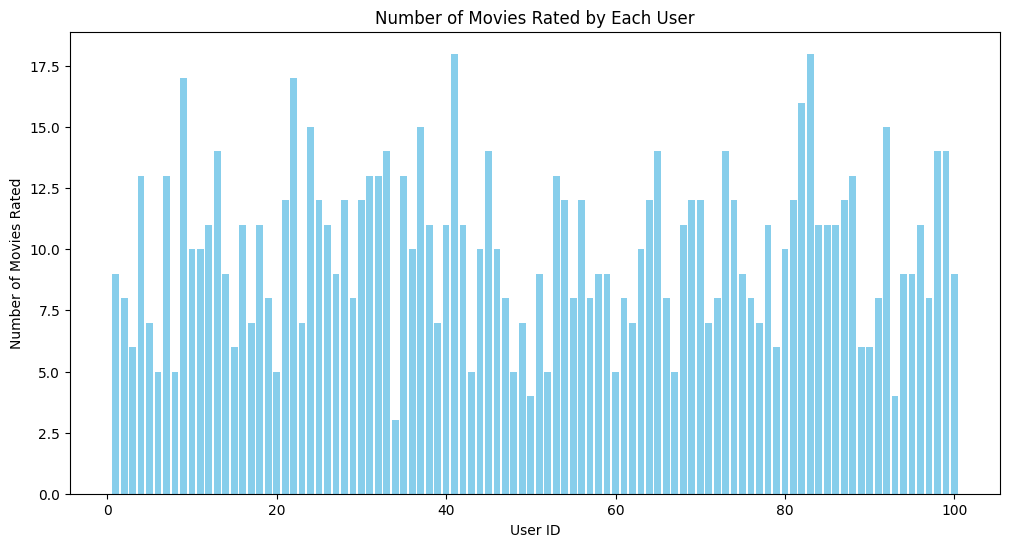

In [88]:
visualization=movie_count.toPandas()
plt.figure(figsize=(12, 6))
plt.bar(visualization['UserID'], visualization['MovieCount'], color='skyblue')
plt.xlabel('User ID')
plt.ylabel('Number of Movies Rated')
plt.title('Number of Movies Rated by Each User')


In [97]:
spark.stop()